## Observations and Insights 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os as os

# Study data files
mouse_metadata_path = "../matplotlib_challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../matplotlib_challenge/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# # Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='left', on=(['Mouse ID', 'Mouse ID']))

# # Display the data table for preview
combined_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [58]:
# Checking the number of mice.
# mouse_count = combined_data["Mouse ID"].unique()
# len(mouse_count)
mouse_count = combined_data_df['Mouse ID'].nunique()

mouse_count

249

In [59]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

dup_mice

array(['g989'], dtype=object)

In [60]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_data_df.loc[combined_data_df['Mouse ID']=='g989', :]

dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df[combined_data_df['Mouse ID'].isin(dup_mice)==False]
# clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [62]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data_df['Mouse ID'].nunique()

clean_mice

248

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_data_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = clean_data_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance = clean_data_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std_deviation = clean_data_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem = clean_data_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

summary_stats_df = pd.DataFrame(
    {
        'Avg Tumor Vol':mean,
        'Median Tumor Vol':median,
        'Var Tumor Vol':variance,
        'Std Dev Tumor Vol':std_deviation,
        'SEM Tumor Vol':sem
    }
)
summary_stats_df.round(2)


,Avg Tumor Vol,Median Tumor Vol,Var Tumor Vol,Std Dev Tumor Vol,SEM Tumor Vol
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_aggregated = clean_data_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregated.round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

In [66]:
mice_count = clean_data_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

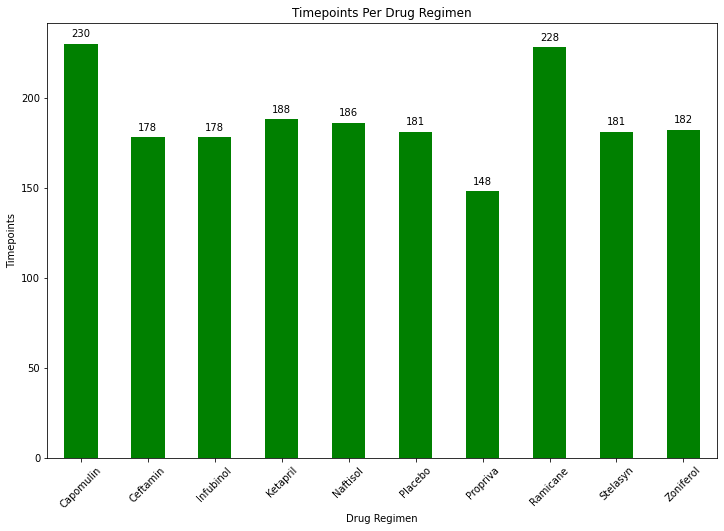

In [74]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_drug = clean_data_df.groupby('Drug Regimen')['Timepoint'].count()
tpd = timepoint_drug.plot(kind="bar", figsize=(12,8), color="g", rot=45)
tpd.bar_label(tpd.containers[0], padding=5)
plt.title("Timepoints Per Drug Regimen")
plt.ylabel("Timepoints")
plt.xlabel("Drug Regimen")

plt.tight_layout
plt.show()

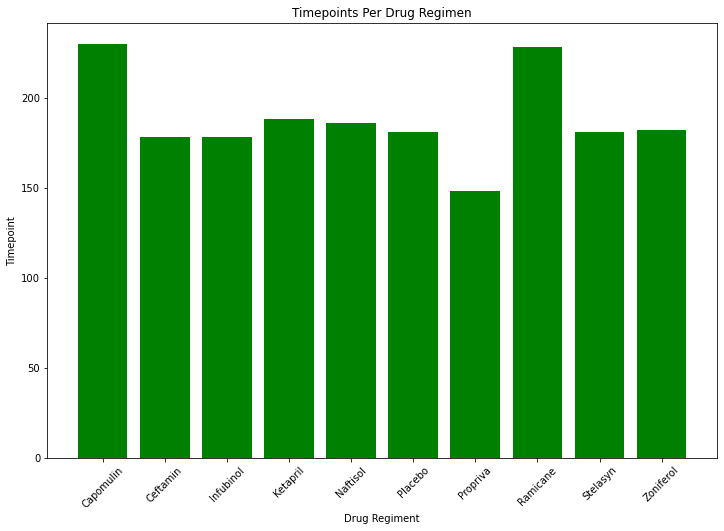

In [68]:
# Generate a bar plot showing the total number of timepoints for all mice tested for 
# each drug regimen using pyplot.
drug_regimen = clean_data_df['Drug Regimen'].sort_values().unique()
timepoint_count = clean_data_df.groupby('Drug Regimen')['Timepoint'].count()

x_axis = np.arange(len(drug_regimen))
tick_locations = [x for x in x_axis]

plt.figure(figsize=(12, 8))
plt.title("Timepoints Per Drug Regimen")
plt.xlabel("Drug Regiment")
plt.ylabel("Timepoint")

plt.bar(x_axis, timepoint_count, alpha=1, color="green", align="center")
plt.xticks(tick_locations, drug_regimen, color="black", rotation=45 )
plt.tight_layout
plt.show()

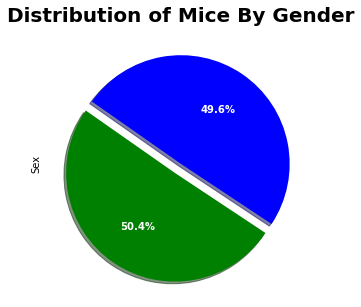

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mouse_metadata = mouse_metadata.loc[~mouse_metadata['Mouse ID'].isin(dup_mice)]
gender_distribution = clean_mouse_metadata['Sex'].value_counts()
colors = ['green', 'blue']
explode = (0.1, 0)

gender_distribution.plot(
    kind="pie", figsize=(5,5), colors = colors, autopct='%1.1f%%', shadow = True, 
    explode = explode, startangle=145, textprops={'color':"white", 'weight':'bold'}
    )
plt.title("Distribution of Mice By Gender", fontsize = 20, weight = 'bold')
plt.savefig("../matplotlib_challenge/images/pie_panda.png")
plt.show()

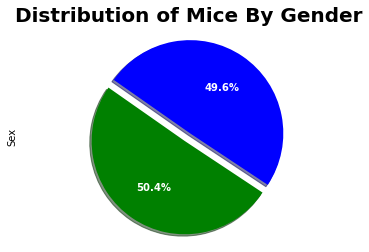

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = clean_mouse_metadata["Sex"].unique()
colors = ['green', 'blue']
explode = (0.1, 0)
plt.pie(
    gender_distribution, labels=labels, colors = colors, explode = explode, 
    shadow = True, autopct="%1.1f%%", textprops={'color':'white', 'weight':'bold'}, startangle=145
    )
plt.axis("equal")
plt.title("Distribution of Mice By Gender", fontsize = 20, weight = 'bold')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [117]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

last_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_df = pd.merge(last_timepoint_df, clean_data_df, how="left", on=('Mouse ID', 'Timepoint'))

final_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [122]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments: 
    final_tumor_treatment = final_df.loc[final_df['Drug Regimen'] == treatment]
    
    # add subset 
    final_tumor_vol.append(final_tumor_treatment['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
for index, treatment in enumerate(final_tumor_vol):
    treatment_name = treatments[index]
    
    quartiles = treatment.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {treatment_name} is: {round(lowerq,2)}")
    print(f"The upper quartile of {treatment_name} is: {round(upperq,2)}")
    print(f"The interquartile range of {treatment_name} is: {round(iqr,2)}")
    print(f"The median of {treatment_name} is: {round(quartiles[0.5],2)}")
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers for {treatment_name}.")
    print(f"Values above {round(upper_bound,2)} could be outliers for {treatment_name}.")
    outliers = (
        final_df.loc[(final_df["Drug Regimen"] == treatment_name) & ((final_df["Tumor Volume (mm3)"] < lower_bound) | 
        (final_df["Tumor Volume (mm3)"] > upper_bound))])
    outliers_no = len(outliers)
    print(f"The number of outliers for {treatment_name} is: {outliers_no}.")
    if outliers_no > 0:
        outlier_list = outliers["Mouse ID"].to_numpy()
        print(f"The outliers are: {outlier_list}.")
    print("------------")

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The median of Capomulin is: 38.13
Values below 20.7 could be outliers for Capomulin.
Values above 51.83 could be outliers for Capomulin.
The number of outliers for Capomulin is: 0.
------------
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The median of Ramicane is: 36.56
Values below 17.91 could be outliers for Ramicane.
Values above 54.31 could be outliers for Ramicane.
The number of outliers for Ramicane is: 0.
------------
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The median of Infubinol is: 60.17
Values below 36.83 could be outliers for Infubinol.
Values above 82.74 could be outliers for Infubinol.
The number of outliers for Infubinol is: 1.
The outliers are: ['c326'].
------------
The l

/var/folders/49/s36vhyf936d19tpm9b2yqny00000gn/T/ipykernel_77490/1751451724.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments, font="arial", fontsize=12)


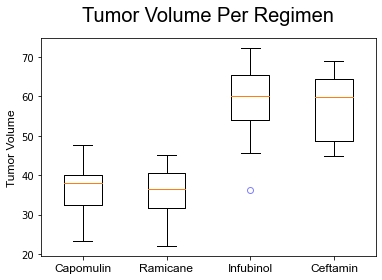

In [149]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume Per Regimen", fontsize=20, font="arial", y=1.05)
ax1.set_ylabel("Tumor Volume", font="arial", fontsize=12)
ax1.set_xticklabels(treatments, font="arial", fontsize=12)

bp = ax1.boxplot(final_tumor_vol)

for flier in bp['fliers']:
    flier.set(marker="o", markeredgecolor="blue", alpha=0.5)

plt.show()

## Line and Scatter Plots

(43.0, 69.0)

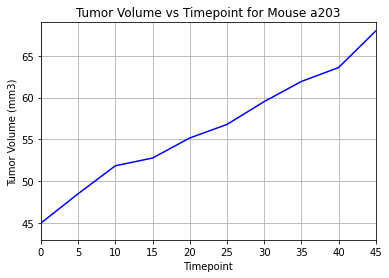

In [151]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
demo_mouse = 'a203'
demo_mouse_df = clean_data_df.loc[clean_data_df['Mouse ID'] == demo_mouse, ['Timepoint', 'Tumor Volume (mm3)']]

plt.plot(demo_mouse_df['Timepoint'], demo_mouse_df['Tumor Volume (mm3)'], color="blue", label=demo_mouse)
plt.title(f"Tumor Volume vs Timepoint for Mouse {demo_mouse}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.xlim(0, max(demo_mouse_df['Timepoint']))
plt.ylim(int(min(demo_mouse_df['Tumor Volume (mm3)']))-2, int(max(demo_mouse_df['Tumor Volume (mm3)'])) + 2)


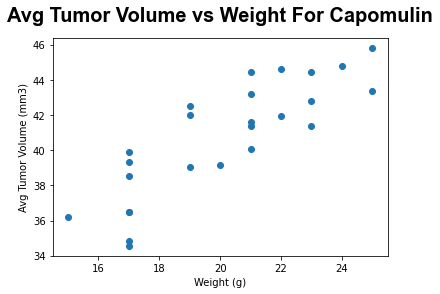

In [153]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin", ['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']]
avg_tumor = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(weight, avg_tumor)
plt.title("Avg Tumor Volume vs Weight For Capomulin", font="arial", fontsize=20, color="black", weight="bold", y=1.05)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
